# Online Retail Data Analysis

Welcome to the Online Retail Data Analysis project!  
This notebook explores transaction data from a UK-based online retail store between 2010 and 2011.

##  Objective

The goal of this analysis is to:
- Clean and preprocess the dataset.
- Understand customer behavior and sales performance.
- Discover patterns in product returns, top-selling items, and sales trends.
- Generate actionable business insights for decision-making.

##  Dataset Overview

The dataset contains:
- **InvoiceNo**: Unique ID for each transaction.
- **StockCode**: Product/item code.
- **Description**: Name of the product.
- **Quantity**
- **InvoiceDate**
- **UnitPrice**
- **CustomerID**
- **Country**

In [5]:
### 1. Importing Libraries and Loading the Dataset

import pandas as pd

In [6]:
# Load cleaned dataset

df = pd.read_csv('online_retail_new.csv')


In [7]:
### 2. Basic Exploration

df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df['CustomerID'].isna().sum()

135080

In [11]:
### 3. Drop Missing Customer IDs and Convert to Integer

df = df.dropna(subset=['CustomerID'])

In [12]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [13]:
df.shape

(406829, 8)

In [14]:
### 4. Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.shape

In [15]:
### 5. Summary Statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [18]:
### 6. Handle Missing Descriptions
df[df['Description'].isna()]
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
desc_map = df.dropna(subset=['Description']).drop_duplicates(subset=['StockCode'])[['StockCode', 'Description']]
df = df.merge(desc_map, on='StockCode', how='left', suffixes=('', '_filled'))
df['Description'] = df['Description'].fillna(df['Description_filled'])
df.drop(columns='Description_filled', inplace=True)
df.isna().sum()
df = df.dropna(subset=['Description'])

In [20]:
### 7. Filter Returns and Free Items
returns_df = df[df['Quantity'] < 0]
sales_df = df[df['Quantity'] > 0]
df = sales_df.copy()

In [23]:
df[df['UnitPrice'] <= 0].shape
free_items_df = df[df['UnitPrice'] == 0]
df = df[df['UnitPrice'] > 0]

In [24]:
### 8. Invoice and Customer Summary
df.groupby('InvoiceNo')['StockCode'].nunique().describe()
df['InvoiceNo'].nunique()
df[df['InvoiceNo'].str.startswith('C')].head()
df['CustomerID'].nunique()
df.groupby('CustomerID')['InvoiceNo'].nunique().value_counts()

InvoiceNo
1      1493
2       835
3       508
4       388
5       242
6       172
7       143
8        98
9        68
10       54
11       52
12       45
13       30
15       28
14       20
17       18
18       14
19       12
20       12
21       11
16       11
25        8
26        7
28        6
22        5
23        5
30        4
37        3
27        3
24        3
31        3
32        3
34        3
33        2
55        2
47        2
39        2
38        2
29        1
41        1
51        1
124       1
63        1
45        1
91        1
46        1
209       1
48        1
201       1
73        1
93        1
44        1
57        1
50        1
62        1
35        1
97        1
86        1
60        1
Name: count, dtype: int64

In [25]:
### 9. Calculate Total Price per Transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

In [26]:
### 10. Build Customer Summary DataFrame
invoice_count = df.groupby('CustomerID')['InvoiceNo'].nunique()
total_qty = df.groupby('CustomerID')['Quantity'].sum()
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()

customer_summary = pd.DataFrame({
    'TotalSpent': df.groupby('CustomerID')['TotalPrice'].sum(),
    'InvoiceCount': invoice_count,
    'TotalQuantity': total_qty,
    'LastPurchaseDate': last_purchase
})

customer_summary['TotalSpent'].sort_values(ascending=False).head(10)
customer_summary['InvoiceCount'].sort_values(ascending=False).head(10)
customer_summary.sort_values('LastPurchaseDate').head(10)
customer_summary.describe()

,TotalSpent,InvoiceCount,TotalQuantity,LastPurchaseDate
count,4338.000000,4338.000000,4338.000000,4338
mean,2054.266460,4.272015,1191.289073,2011-09-08 11:38:59.045643008
min,3.750000,1.000000,1.000000,2010-12-01 09:53:00
25%,307.415000,1.000000,160.000000,2011-07-20 19:18:00
50%,674.485000,2.000000,379.000000,2011-10-20 10:40:30
75%,1661.740000,5.000000,992.750000,2011-11-22 11:05:45
max,280206.020000,209.000000,196915.000000,2011-12-09 12:50:00
std,8989.230441,7.697998,5046.081546,NaN


In [27]:
### 11. Prepare for Time-Based Analysis
import datetime
latest_date = df['InvoiceDate'].max()
customer_summary['LastPurchaseDate'] = pd.to_datetime(customer_summary['LastPurchaseDate'])

<Axes: title={'center': 'Top 10 Countries by Total Sales (Excl. UK)'}, xlabel='Country', ylabel='Total Sales'>

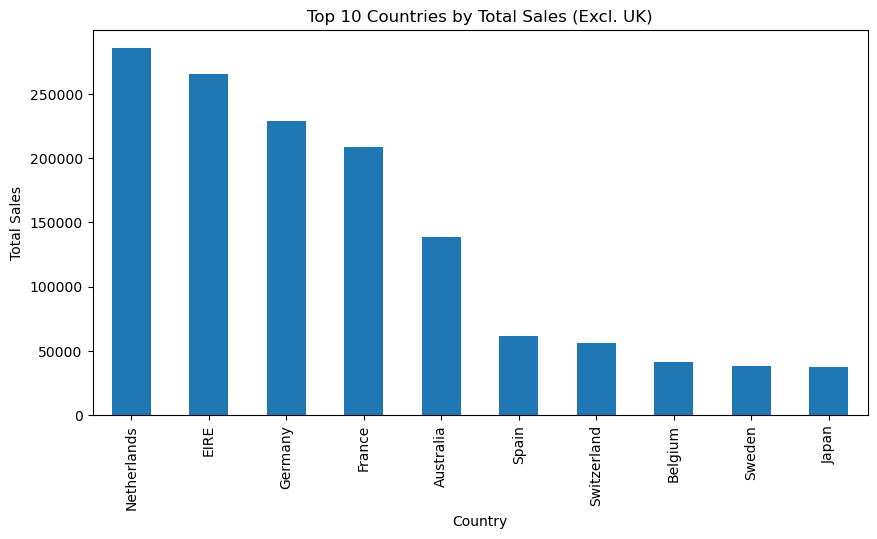

In [28]:
### 12. Top 10 Countries by Sales (excluding UK)
import matplotlib.pyplot as plt
top_countries = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Total Sales (Excl. UK)', ylabel='Total Sales', xlabel='Country')

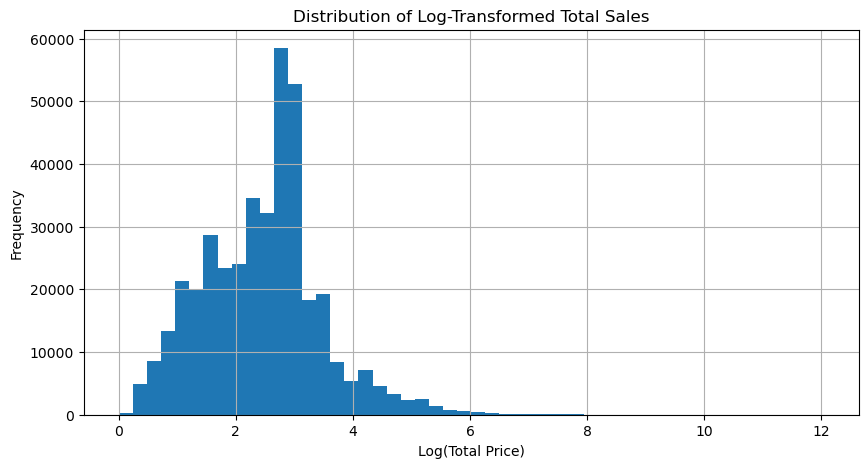

In [35]:
import numpy as np

df['LogTotalPrice'] = np.log1p(df['TotalPrice'])  # log(1 + x) to avoid log(0)

df['LogTotalPrice'].hist(bins=50, figsize=(10,5))
plt.title("Distribution of Log-Transformed Total Sales")
plt.xlabel("Log(Total Price)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

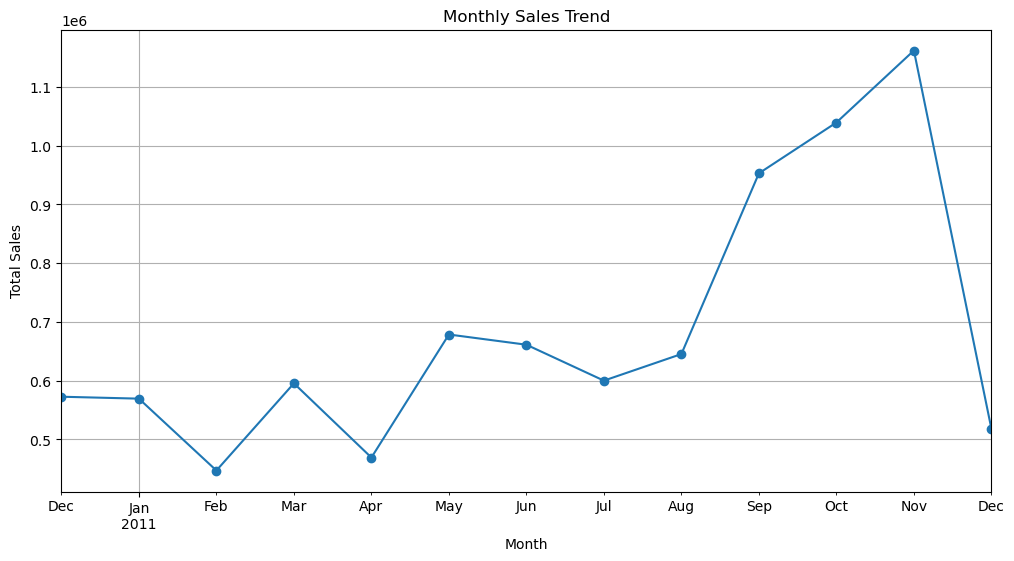

In [30]:
### 14. Monthly Sales Trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_sales.plot(kind='line', figsize=(12,6), marker='o', title='Monthly Sales Trend')
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

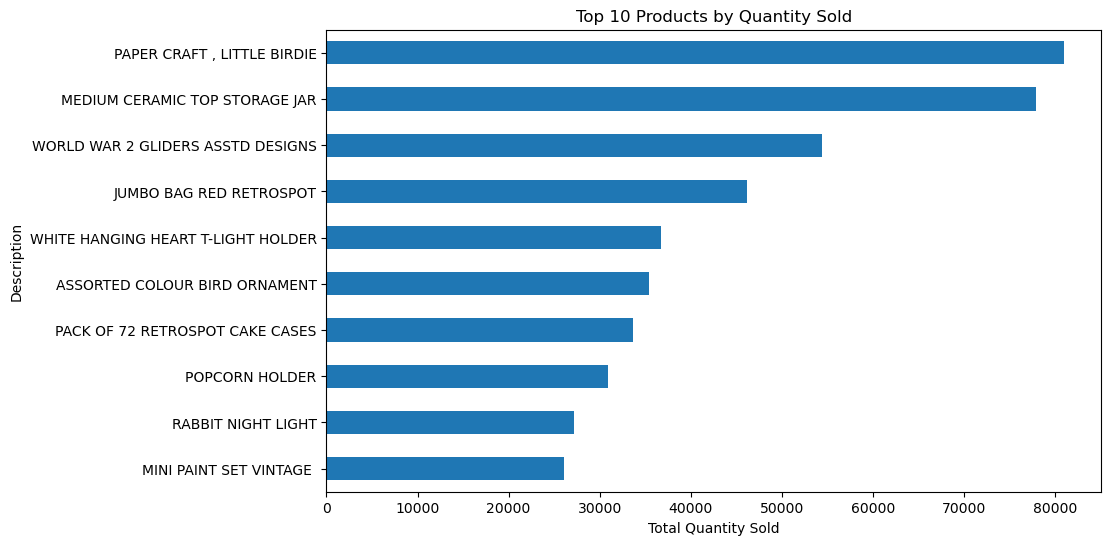

In [31]:
### 15. Top 10 Products by Quantity Sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,6), title='Top 10 Products by Quantity Sold')
plt.xlabel("Total Quantity Sold")
plt.gca().invert_yaxis()
plt.show()

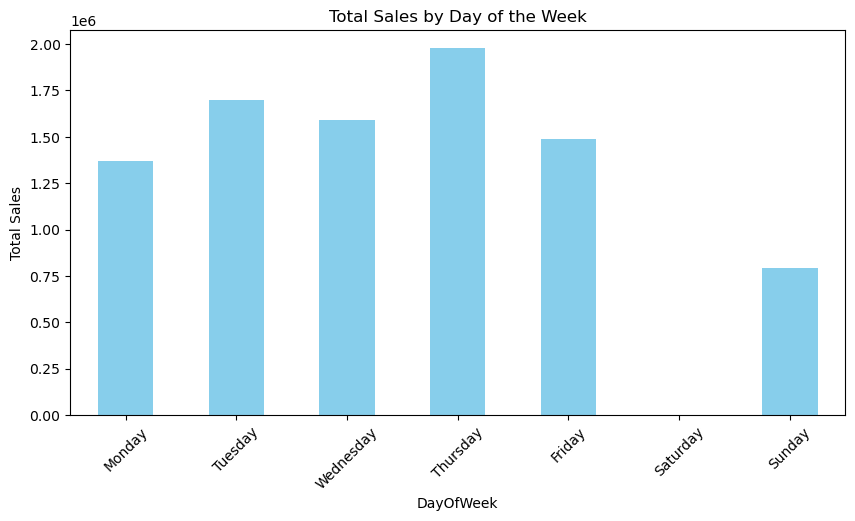

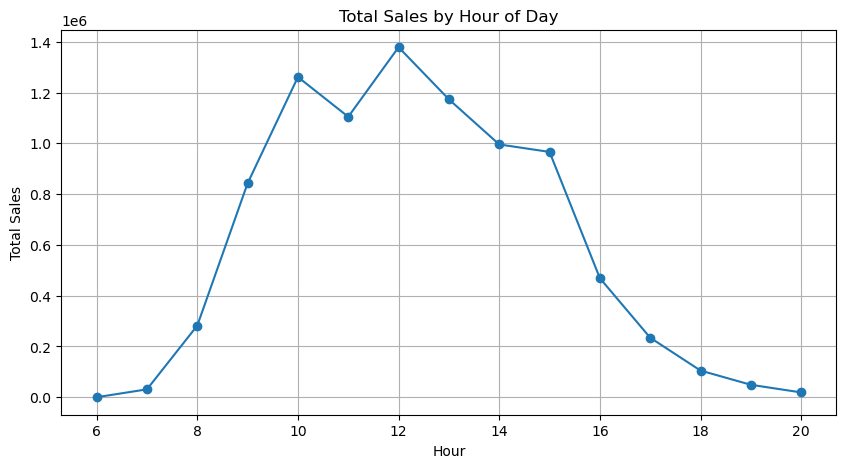

In [32]:

### 16. Time-based Sales Analysis by Day and Hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

day_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
day_sales.plot(kind='bar', figsize=(10,5), title='Total Sales by Day of the Week', color='skyblue')
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

hour_sales = df.groupby('Hour')['TotalPrice'].sum()
hour_sales.plot(kind='line', figsize=(10,5), marker='o', title='Total Sales by Hour of Day')
plt.ylabel("Total Sales")
plt.xlabel("Hour")
plt.grid(True)
plt.show()

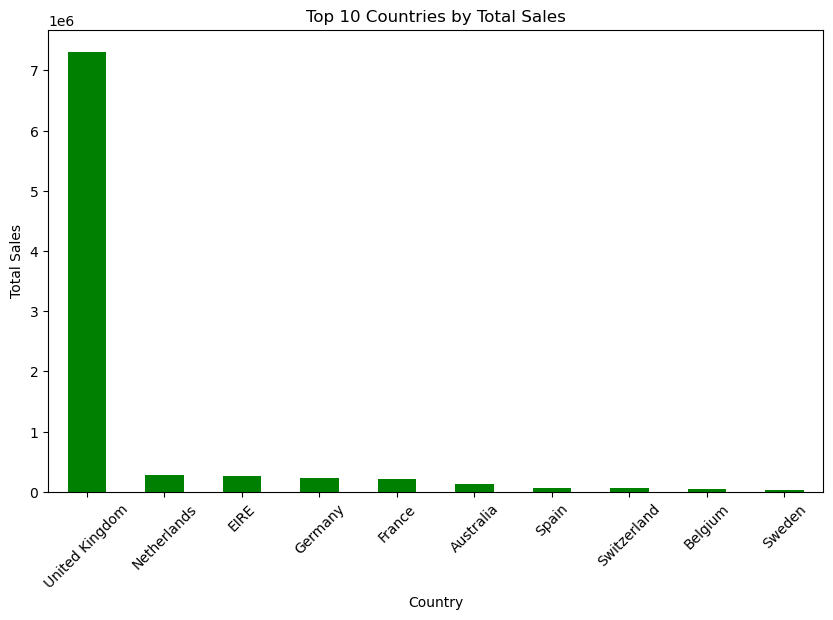

In [33]:
### 17. Country-Level Sales Analysis
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(10,6), title='Top 10 Countries by Total Sales', color='green')
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

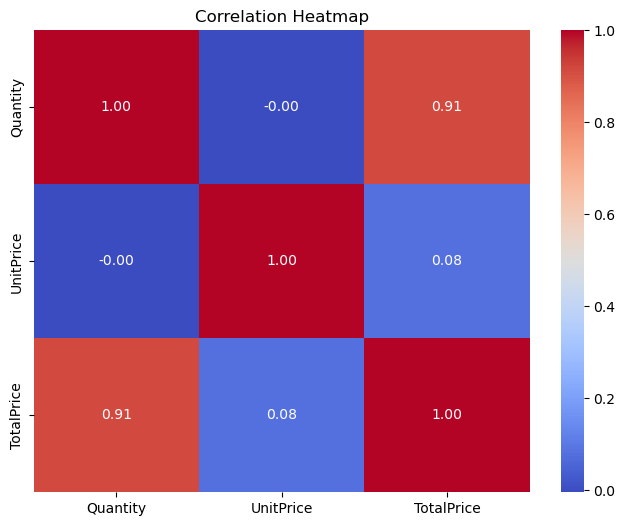

In [34]:
### 18. Correlation Heatmap
import seaborn as sns
corr_df = df[['Quantity', 'UnitPrice', 'TotalPrice']]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##  Conclusion

In this project, we explored and cleaned an online retail dataset. Through exploratory data analysis, we gained key insights into customer behavior, sales trends, and product performance.

### Key Takeaways:
- Most sales occurred during weekdays and working hours.
- A small number of products and customers contribute to the majority of sales.
- Strong correlation was found between `Quantity` and `TotalPrice`, as expected.
- The United Kingdom dominated overall sales.

### Future Work:
- Build a customer segmentation model (e.g., RFM analysis).
- Forecast future sales using time series models.
- Detect anomalies or fraudulent transactions.

This notebook provided a solid foundation for understanding the dataset and can be extended for more advanced analytics or machine learning tasks.
